In [1]:
""" 
# ALURA - Desafio: 7DaysOfCode - Junho/2024
# Dia 3: Analise dos dados 
"""
import os
import pandas  as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#
"""
# Função: Monta o endereço Pasta + Arquivo
"""
fxPathFile = lambda _strCaminho, _strArquivo : os.path.join(_strCaminho, _strArquivo)

"""
# Função: Converte os valores de uma coluna STRING de um DataFrame para Data
"""
fxConvParaData = lambda _df, _strNomeColuna : pd.to_datetime(_df[_strNomeColuna]) 

"""
# Função: Converte o valor de uma Variável STRING para Data
"""
fxConvStrParaData = lambda _strNomeColuna : pd.to_datetime(_strNomeColuna, dayfirst=True) 
  
"""
# Gráfico de linha 
"""
def grafico_emprestimos_totais(_df, _strNomeColuna, anoInicio, anoFim, mesInicio, mesFim):
    """Cria gráfico de linha com a quantidade total de empréstimos por mês/ano."""
    _dtaDataInicial = fxConvStrParaData('01/' + str(mesInicio) + '/' + str(anoInicio))
    _dtaDataFinal   = fxConvStrParaData('31/' + str(mesFim) + '/' + str(anoFim))

    _df = _df.loc[(_df[_strNomeColuna] >= _dtaDataInicial) & (_df[_strNomeColuna] < _dtaDataFinal)]
    _df = _df.groupby(pd.Grouper(key=_strNomeColuna, freq='M')).size()

    plt.figure(figsize=(10, 6))     # Altura, largura do gráfico
    plt.plot(_df.index, _df.values, marker='o', )   # Dados para imprimir
    plt.xlabel('Mês/Ano', fontsize=12)
    plt.ylabel('Quantidade de Empréstimos', fontsize=12)
    plt.title(f'Total de Empréstimos', fontsize=16)
    plt.xticks(fontsize=10)     # Marcadores do gráfico
    plt.yticks(fontsize=10)     # Marcadores do gráfico
    #plt.grid(True)             # Mostra ou Não o GRID
    plt.show()

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 30

## Inicializa as variáveis

In [2]:
_intAnoInicio     = 2010
_intAnoFim        = 2020
_intMesInicio     = 1
_intMesFim        = 12
_strExtArquivo    = '.csv'
_strDB_Emprestimo = 'DB_Emprestimo' + _strExtArquivo
_strPathData      = r'D:\Users\rtoni\OneDrive\Git-Dados\Projetos\7DaysOfCode.io'       # Pasta que armazena o arquivo
_strPathFile      = fxPathFile(_strPathData, _strDB_Emprestimo)

## Carrega os dados e converte as colunas

In [4]:
df_Emprestimo = pd.read_csv(_strPathFile, sep=';', engine='c')
df_Emprestimo['matricula_siape'] = df_Emprestimo['matricula_siape'].astype(str)
df_Emprestimo['data_emprestimo'] = fxConvParaData(df_Emprestimo, 'data_emprestimo')
df_Emprestimo['data_devolucao']  = fxConvParaData(df_Emprestimo, 'data_devolucao')
df_Emprestimo['data_renovacao']  = fxConvParaData(df_Emprestimo, 'data_renovacao')
df_Emprestimo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,Nome_Faixa_CDU,matricula_siape
0,709684,L095049,NaT,2010-01-04 07:44:00,2010-01-05 16:26:00,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2008023265.0
1,726965,L095049,2010-03-31 12:41:00,2010-03-01 12:40:00,2010-04-30 14:42:00,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2009121584.0
2,709685,L167050,NaT,2010-01-04 07:44:00,2010-01-12 07:34:00,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2008023265.0
3,717763,L167050,NaT,2010-02-11 11:16:00,2010-03-04 08:54:00,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,2008050352.0
4,729996,L167050,2010-03-17 09:08:00,2010-03-04 13:36:00,2010-03-31 18:04:00,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,Ciências aplicadas.,200722565.0


## Verificando a relação entre empréstimo e empréstimo de exemplar

In [5]:
df_Emprestimo['id_emprestimo'].value_counts()

id_emprestimo
2010326     3
2014596     3
10240112    3
2422542     3
9690168     3
           ..
2767562     1
2317930     1
2283256     1
2262867     1
2989061     1
Name: count, Length: 2068724, dtype: int64

In [ ]:
"""
# Verifica se cada empréstimo [id_emprestimo] possui mais de um exemplar
# 
"""
df_Emprestimo.loc[ df_Emprestimo['id_emprestimo'] == 2010326 ]

## Quantos empréstimos foram realizados ao total?

In [6]:
display(len(df_Emprestimo['id_emprestimo'].drop_duplicates()))

2068724

## Quantidade de exemplares emprestados por ano

In [10]:
df_EmprestimoData = df_Emprestimo['data_emprestimo'].value_counts().reset_index()
df_EmprestimoData.columns = ['DataEmprestimo','Qtde']
df_EmprestimoData['DataEmprestimo'] = fxConvParaData(df_EmprestimoData, 'DataEmprestimo')
df_EmprestimoData

,DataEmprestimo,Qtde
0,2016-07-20 10:35:00,51
1,2020-02-27 09:13:00,37
2,2019-07-24 09:15:00,37
3,2016-07-20 11:34:00,31
4,2018-07-25 16:32:00,31
...,...,...
969632,2010-08-16 16:55:00,1
969633,2014-08-01 14:38:00,1
969634,2014-05-21 13:29:00,1
969635,2013-11-27 15:06:00,1


In [11]:
df_EmprestimoPorAno = df_EmprestimoData.groupby(by=df_EmprestimoData['DataEmprestimo'].dt.year).sum(numeric_only=True)
df_EmprestimoPorAno.index.name = 'ano'
df_EmprestimoPorAno

,Qtde
ano,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189
2015,213582
2016,215900
2017,218462
2018,194080


## Configurando tema dos gráficos

In [12]:
sns.set_theme(
    context='notebook', 
    style='darkgrid', 
    palette='deep', 
    font_scale=1.3, 
    rc={"figure.figsize":(10, 4)}
)

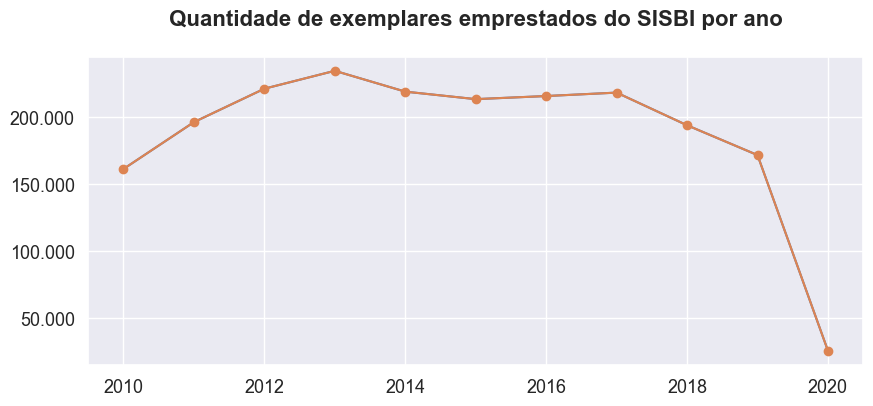

In [13]:
ax = sns.lineplot(data=df_EmprestimoPorAno, x='ano', y='Qtde')
ax.set_title(
    'Quantidade de exemplares emprestados do SISBI por ano'+'\n',
    size=16,
    loc='center',
    weight='bold'
)
ax.set(xlabel=None, ylabel=None)
ax.plot(df_EmprestimoPorAno.index, df_EmprestimoPorAno.values, marker='o')
ax.tick_params(axis='both', labelsize='small')
ax.yaxis.set_major_formatter( ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')) )   
ax = ax

In [ ]:
grafico_emprestimos_totais(df_Emprestimo, 'data_emprestimo', _intAnoInicio, _intAnoFim, _intMesInicio, _intMesFim)

In [ ]:
_dtaDataInicial = fxConvStrParaData('01/01/2010')
_dtaDataFinal   = fxConvStrParaData('31/12/2020')
display(_dtaDataInicial, _dtaDataFinal)
df = df_Emprestimo.loc[ (df_Emprestimo['data_emprestimo'] >= _dtaDataInicial) & (df_Emprestimo['data_emprestimo'] <= _dtaDataFinal) ]
display(df)

In [ ]:

# 2. Gráfico de Empréstimos por Biblioteca Mensais
def grafico_emprestimos_biblioteca(df, ano, mes):
    """Cria gráfico de linha com a quantidade de empréstimos por biblioteca por mês/ano."""
    df_filtrado = df[(df['data empréstimo'].dt.year == ano) & (df['data empréstimo'].dt.month == mes)]
    agrupado = df_filtrado.groupby(['biblioteca', pd.Grouper(key='data empréstimo', freq='M')]).size().unstack()

    plt.figure(figsize=(12, 6))
    for biblioteca in agrupado.columns:
        plt.plot(agrupado.index, agrupado[biblioteca], label=biblioteca, marker='o')
    plt.xlabel('Mês/Ano', fontsize=12)
    plt.ylabel('Quantidade de Empréstimos', fontsize=12)
    plt.title(f'Empréstimos por Biblioteca - {mes}/{ano}', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# 3. Gráfico de Empréstimos por Nome_Faixa_CDU Mensais
def grafico_emprestimos_cdu(df, ano, mes):
    """Cria gráfico de linha com a quantidade de empréstimos por CDU por mês/ano."""
    df_filtrado = df[(df['data empréstimo'].dt.year == ano) & (df['data empréstimo'].dt.month == mes)]
    agrupado = df_filtrado.groupby(['Nome_Faixa_CDU', pd.Grouper(key='data empréstimo', freq='M')]).size().unstack()

    plt.figure(figsize=(12, 6))
    for cdu in agrupado.columns:
        plt.plot(agrupado.index, agrupado[cdu], label=cdu, marker='o')
    plt.xlabel('Mês/Ano', fontsize=12)
    plt.ylabel('Quantidade de Empréstimos', fontsize=12)
    plt.title(f'Empréstimos por CDU - {mes}/{ano}', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# 4. Gráfico de Empréstimos de Exemplares Mensais
def grafico_emprestimos_exemplares(df, ano, mes):
    """Cria gráfico de linha com a quantidade de exemplares emprestados por mês/ano."""
    df_filtrado = df[(df['data empréstimo'].dt.year == ano) & (df['data empréstimo'].dt.month == mes)]
    agrupado = df_filtrado.groupby(pd.Grouper(key='data empréstimo', freq='M')).size()

    plt.figure(figsize=(12, 6))
    plt.plot(agrupado.index, agrupado.values, marker='o')
    plt.xlabel('Mês/Ano', fontsize=12)
    plt.ylabel('Quantidade de Exemplares Emprestados', fontsize=12)
    plt.title(f'Exemplares Emprestados - {mes}/{ano}', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()




grafico_emprestimos_biblioteca(df, ano, mes)
grafico_emprestimos_cdu(df, ano, mes)
grafico_emprestimos_exemplares(df, ano, mes)

# Storytelling da movimentação:
print("\n## Storytelling da Movimentação")
print("Analisando os horários de maior e menor movimentação, podemos observar que a biblioteca apresenta picos de atividade durante os horários de expediente e estudo, "
      "com maior movimento durante as primeiras horas da manhã e da tarde. Os horários de menor movimento se concentram geralmente no início da manhã e no fim da tarde.")
print("Considerando que são necessárias 2 pessoas no atendimento e que cada biblioteca possui 5 funcionários, o melhor horário para o almoço seria entre 12h e 14h, "
      "e para o jantar entre 19h e 21h, aproveitando os períodos de menor movimento para garantir a cobertura do atendimento.")

In [ ]:
pd.options.display.max_columns = 30

# 5. Gráfico e Tabela de Movimentação por Período de 20 Minutos
def analise_movimentacao(df):
    """Cria gráfico e tabela com a movimentação por períodos de 20 minutos."""
    df['hora_emprestimo'] = df['data_emprestimo'].dt.hour
    df['minuto_emprestimo'] = df['data_emprestimo'].dt.minute
    df['periodo'] = (df['hora_emprestimo'] * 60 + df['minuto_emprestimo']) // 20

    agrupado = df.groupby(['biblioteca', 'periodo']).size().unstack(fill_value=0)
    agrupado.index.name = 'Biblioteca'

    # Criando o gráfico
    plt.figure(figsize=(15, 6))
    for biblioteca in agrupado.index:
        plt.plot(agrupado.columns, agrupado.loc[biblioteca], label=biblioteca, marker='o')
    plt.xlabel('Período (20 minutos)', fontsize=12)
    plt.ylabel('Quantidade de Empréstimos', fontsize=12)
    plt.title('Movimentação por Período de 20 Minutos', fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

    # Criando a tabela
    tabela = agrupado.stack().reset_index(name='Quantidade total')
    tabela['Período'] = tabela['periodo'].apply(lambda x: f"{x//3}h{(x%3)*20:02d} - {x//3}h{(x%3)*20 + 19:02d}")
    tabela = tabela[['Biblioteca', 'Período', 'Quantidade total']]
    print(tabela.sort_values(['Biblioteca', 'Período']))
    
analise_movimentacao(df_Emprestimo)

In [ ]:
import numpy as np
from matplotlib.colors import LogNorm

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')